### A Crash Course on Neural Networks with Keras

Some broad questions:

  - What is an artifical neural network? What is "Deep learning"?
  - Why should we use them/ be interested in them?
  - When should we use them? What can we do with them? How should we use them?
  - *What interesting problems in physics can deep learning/neural networks help us approach?*
  
Specifically: Focus is on building and training deep neural networks with [Keras](https://keras.io/). Going to look at three main areas/frameworks:

  - Supervised learning
  - Unsupervised learning (Generative Models)
  - Reinforcement learning
  
In some sense, this is qoing to be quick and dirty, with a focus on code that works, and I'm *not* going to talk about statistical learning theory (sample complexity, generalization bounds etc) - but, this is interesting! See [Michael Wolf's lecture notes](https://www-m5.ma.tum.de/foswiki/pub/M5/Allgemeines/MA4801_2016S/ML_notes_main.pdf) for a good introduction and survey.
  


#### 1) Getting Started - Supervised Learning and Feed-Forward Neural Networks

Supervised learning involves learning from _labelled data_, drawn from an underlying probability distribution.

Typical example is categorical prediction: Given an image belonging to one of a certain number of categories, we would like a function which can assign the image to the correct category.

In a supervised learning setting we assume we have a (big) dataset of images labelled by category, and we would like to use this information to "train" a neural network (parametrized function from image to category label) such that ultimately it can correctly predict/assign categories to *unseen* images.


i.e. [MNIST](http://yann.lecun.com/exdb/mnist/):

<img src="images/mnist_100_digits.png",width=300,height=300>

So, the first questions we answer are:

   - How do we construct suitable (parametrized) functions via neural networks?
   - How do we use the labelled data to obtain the optimal parametrization? (How do we "learn" from the data?)
   
This intro, and all diagrams, are taken (almost) verbatim from [Michael Nielsen's online book](http://neuralnetworksanddeeplearning.com/index.html).

##### 1a) What is a neural network?

Really, a neural network is nothing but a parameterized function! 

It is helpful to start by considering the simplest building block - a "perceptron" or "artificial neuron":

<img src="images/perceptron.png",width=200,height=200>

In this case, $x_i$ are binary inputs, and the output is a binary variable given by:

$$\begin{eqnarray}
  \mbox{output} & = & \left\{ \begin{array}{ll}
      0 & \mbox{if } \sum_j w_j x_j \leq  \mbox{threshold} \\
      1 & \mbox{if } \sum_j w_j x_j > \mbox{ threshold}
      \end{array} \right.
\tag{1}\end{eqnarray}
$$

where $\{w_j\}$ are the perceptron *weights*. Typically though, we will incorporate the threshold as a perceptron *bias* and rewrite the perceptron function as:

$$
\begin{eqnarray}
  \mbox{output} = \left\{ 
    \begin{array}{ll} 
      0 & \mbox{if } w\cdot x + b \leq 0 \\
      1 & \mbox{if } w\cdot x + b > 0
    \end{array}
  \right.
\tag{2}\end{eqnarray}
$$


Given perceptrons, we can now build *artificial neural networks* (ANNs) by combining perceptrons:

<img src="images/mlp.png",width=400,height=400>

What is the representational power of such networks? Well, we can implement a NAND gate with the following perceptron:

<img src="images/nand.png",width=200,height=200>

So, in principal, *any* logical function can be represented by an ANN of perceptrons - great!

But, remember that the goal is to develop ("learning") algorithms via which we can can iteratively update the weights/parameters of the ANN in order to obtain the function that we want (but dont know a priori) -  In order to develop such algorithms it turns out that we want *differentiable* ANN's. 
   
Additionally, we would like to deal with more than binary variables!

To this end, lets rewrite the perceptron as:

$$\mbox{output} = f(z)$$

where $z = w\cdot x + b$ and $f$ is the heaviside step function.

Using this formalism we can obtain more general and differentiable ANN's by considering alternative functions $f$. Typical examples are:

  - $f(z) = \mathrm{sigmoid}(z) = \frac{1}{1+e^{-z}}$
  - $f(z) = \tanh(z)$
  - $f(z) = \mathrm{relu}(z)$ where $\mathrm{relu}(z) = 0$ if $z < 0$ or $z$ if $ z \geq 0$







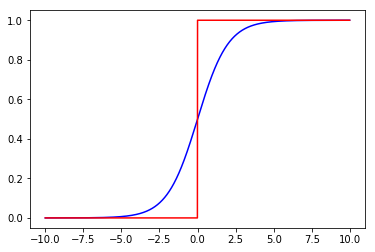

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def sigmoid(z):
    return 1/(1+np.exp(-z))

def heaviside(z):
    if z < 0:
        return 0
    else:
        return 1
    
x_range = [j/100 for j in range(-1000,1000)]
sigmoid_vals = [sigmoid(x) for x in x_range]
heaviside_vals = [heaviside(x) for x in x_range]

_ = plt.plot(x_range, sigmoid_vals,'b',x_range, heaviside_vals,'r')  

As it turns out, feed-forward neural networks containing a single hidden layer with a finite number of sigmoid neurons can approximate arbitrary continuous functions on compact subsets of $\mathbb{R}^n$ - the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem).

This is obviously good news, BUT! This theorem gives us no insight how to *learn* a given parametrization.

##### 1b) How do we train a neural network?

In order to talk about this, its helpful to consider a concrete example, like MNIST.

In this case we can imagine using a feed forward neural network architecture along these lines:

<img src="images/mnist_net.png",width=400,height=400>

In this architecture the network has ten outputs, each of which we can associate with a probability of the input image belonging to a specific category.

The first step towards learning algorithms is to construct a (differentiable) *cost function* over the dataset. For example we could use the Mean Squared Error (MSE):

$$C(\{w_j,b_j\}) = \frac{1}{2N}\sum_{i = 1}^N\| y(x_i) - y^T_i\|^2\tag{3}$$

where $y(x_i)$ is the vector output of the neural network on the input $x_i$, and $y^T_i$ is the target label for $x_i$ given as a *one-hot* vector - i.e. a vector of zeros except for a 1 in the index corresponding to the image category (the probability distribution you get when you know the answer).

Now the problem is well defined: We want to obtain a parametrization of the ANN, such that the cost function, over the entire dataset, is minimized. 

In general, for any non-trivial architectures, finding this minimum directly is not an option, and so we would like to develop and utilize iterative approaches.

A very natural approach is *gradient descent*:

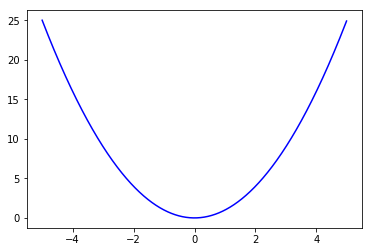

In [3]:
x_range = [j/100 for j in range(-500,500)]
x_squared = [x**2 for x in x_range]

_ = plt.plot(x_range, x_squared,'b') 

As an illustration lets just consider a simple function like $f(x) = x^2$. To find the minimum we can use the rule:

$$x' = x - \eta\frac{\partial f}{\partial x}\Big|_{x}$$

Where $\eta$ is the step size (which its clear will require some thought to choose in an appropriate way).

Analagously for our multi-dimensional cost function we can use the rule:

$$ w'_j = w_j - \eta\frac{\partial C}{\partial w_j}\Big|_{\{w_j, x_i,\ldots\}}\tag{4}$$

But how do we obtain the partial derivatives? Provided that all elements (activation functions, cost function) are differentiable, these partial derivatives can be obtained via the chain rule.

This is the famous [Backpropogation](http://colah.github.io/posts/2015-08-Backprop/) algorithm - really nothing but the chain rule! 

However, actually doing this for a given architecture is tedious - but worth doing for a simple architecture, at least once :)

At this point we can finally understand exactly what Keras, Tensorflow, Caffe, PyTorch, Theano really are. They are nothing but *autograd* packages, which quickly and automatically take all partial derivatives and calculate all required gradients for *arbitary* network architectures!

######  - Some practical considerations:

The way we have defined things so far implies evaluating the ANN on the entire dataset before calculating the gradients and doing a weight update.

In practice, it works better to use *Stochastic Gradient Descent*:

   - Pick a small batch (minibatch in the jargon) randomly from the training set.
   - Calculate the loss and gradients from this minibatch.
   - Perform a weight update. 
   
The idea is that this random sampling gives good approximations to the total loss, without requiring as many forward passes through the network.

In practice of course there are now more sophisticated ways to do this, which take into account aspects like momentum, in an attempt to solve the major problems of:

   - slow convergence
   - avoiding local minima

<img src="images/optimizers_1.gif",width=400,height=400>

The [keras docs](https://keras.io/optimizers/) contains a list of available implementations with references.

##### 1c) When does this become "deep" learning? How do I get intuition for why this might work?

Roughly, we can think of each neuron in a layer as extracting a certain feature from the data:

<img src="images/interpretation.png",width=400,height=600>

The idea/intuition is that when stacking multiple layers on top of each other, we can view each layer as extracting a succesively more abstract set of features (think of v1 -> v5 cortex in the brain).

<img src="images/nn_2_layers.png",width=400,height=400>

Really, "deep learning" is nothing but the training of "deep neural networks", which, when working well, manage to extract hierachies of succesively abstract features.



#### 2) Building and Training a Feed-Forward Neural Network for MNIST classification with Keras

Ok, lets see how easy this is using Keras...

In [6]:
# ------- Imports -----------

import numpy as np
from numpy import random as rd

import keras as K
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential, Model
from keras.regularizers import l1_l2
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.datasets import mnist

%matplotlib inline
import matplotlib.pyplot as plt

We start by loading the data, and setting some of the important properties:

In [8]:
(x_train_images, y_train), (x_test_images, y_test) = mnist.load_data()

num_training_instances = x_train_images.shape[0]
num_test_instances = x_test_images.shape[0]

image_width = x_train_images.shape[1]
image_height = x_train_images.shape[2]

num_categories = 10

Lets view a random selection of the data...

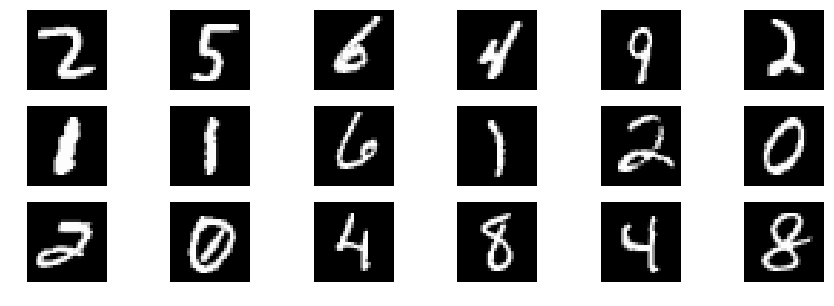

In [10]:
display_width = 6
display_height = 3
display_indices = rd.choice(num_training_instances,display_width*display_height,replace=False)

fig, axes1 = plt.subplots(display_height,display_width,figsize=(15,5))
counter = 0
for j in range(display_height):
    for k in range(display_width):
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x_train_images[display_indices[counter],:,:], cmap = 'gray')
        counter += 1

Because we are going to use a feed-forward neural network, we need to reshape the instances into feature vectors.

We also rescale the data to be between 0 and 1 - NB: This is an important step! In general ensuring the correct scaling and distribution of inputs, activations and weights is non-trivial and actively researched! See for example [this recent paper](https://arxiv.org/abs/1706.02515) for state of the art and discussion with lots of references, as well as [this excellent tutorial](http://cs231n.github.io/neural-networks-2/) for a detailed discussion.

In [11]:
num_features = image_width*image_height

x_train_vectors = np.reshape(x_train_images,[num_training_instances,num_features])/255
x_test_vectors = np.reshape(x_test_images,[num_test_instances,num_features])/255

print("Training dataset shape:", x_train_vectors.shape )
print("Test dataset shape:    ", x_test_vectors.shape )

Training dataset shape: (60000, 784)
Test dataset shape:     (10000, 784)


Additionally, the image labels are currently integers between 0 and 9. We need to convert these into one-hot labels - i.e. a ten dimensional vector with a 1 in the index corresponding to the category. As discussed, this allows us to meaningfully compare the label with a predicted probability distribution over the images.

In [12]:
y_train_onehot = np.zeros((num_training_instances,num_categories))
y_test_onehot = np.zeros((num_test_instances,num_categories))

for j in range(num_training_instances):
    y_train_onehot[j,y_train[j]] = 1
    
for j in range(num_test_instances):
    y_test_onehot[j,y_test[j]] = 1

Now the preprocessing work is done, we can build the model architecture.

Lets first build a really simple model to get a feel for the syntax and ingredients. 

In a nutshell, ANN architectures are constructed by chaining together Keras [Layers](https://keras.io/layers/about-keras-layers/).

This can be achieved through either the Keras *Model* class, or the Keras *Sequential* class. The Sequential class is simpler, but less flexible, so lets jump straight into the Model class (which is also extremely easy!):

In [17]:
# The first layer of any Model is always an input layer.
#      - For this first layer we have to explictly provide the input shape. Note the placeholder for batch size!

inputs = Input(shape = (num_features,), name = "Inputs")

# We then add layers to the model, specifiying the layer whose outputs should be acted on:
layer_1 = Dense(units=100, activation="relu", name="Layer_1")(inputs)
layer_2 = Dense(units=50, activation="relu", name="Layer_2")(layer_1)
outputs = Dense(units=num_categories, activation="softmax", name="Predictions")(layer_2)

# We then instantiate the model as a function from inputs to outputs - the relevant layers are inferred automatically.
simple_ffnn = Model(inputs=inputs, outputs=outputs, name = "Simple_FFNN")

# Finally, we compile the model, specifying a loss function, an optimizer, and the metrics we are interested in.
simple_ffnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
# To check that everything worked as we expected we can view a summary of the model (the computational graph):
simple_ffnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
Layer_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
Layer_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
Predictions (Dense)          (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


One thing that I haven't yet mentioned is dropout and regularization!

Of course, the real problem that we are interested in is not really to train an ANN that can get high accuracies on the training set, but to train an ANN that can get high accuracies on *unseen data* (which we assume is drawn from the same probability distribution as the data). This is the problem of *generalization*.

I dont want to go into details, but two standard techniques are:

   - [dropout](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf)
   - [regularization](http://cs231n.github.io/neural-networks-2/)
    
Roughly, the idea of dropout is to randomly set to zero the activations of certain neurons, in order to encourage the network to not rely completely on very small subset of features. Regularization is more complex and comes in more flavours. See the reference for details!

Of course, in general its nice to have a function that allows you to build arbitrary architectures with ease:

In [22]:
def build_ffnn(ff_layers, num_features, num_outputs, learning_rate):
    """"
    This function builds and compiles a Feed Forward Neural Network. In particular it possible to specify
    the structure of the feed forward layers arbitrarily, using the following convention:
    
      - ff_layers is a list of lists. Each inner list has the form [neurons, output_dropout]
    
    :param: num_features: the number of input features to the NN
    :param: num_categories: The length of the target label
    :param: ff_layers: A specification of the feed forward structure of the network, in the form given above.
    :param: initial_lr: The initial lr for the optimizer
    :return: nnet: The feed forward neural network, as a Keras sequential object  
    """
    
    inputs = Input(shape=(num_features,), name = "Inputs")
    
    dense_layers = []
    dropout_layers = []
    
    for j in range(len(ff_layers)):
        if j == 0:
            dropout_layers.append(Dropout(rate=ff_layers[j][1],name="dropout_on_inputs")(inputs))
        else:
            dropout_layers.append(Dropout(rate=ff_layers[j][1],name="dropout_on_dense_layer_"+str(j))(dense_layers[j-1]))
            
        dense_layers.append(Dense(units=ff_layers[j][0], 
                            activation="relu", 
                            name="dense_layer_"+str(j+1))(dropout_layers[j]))
    
    outputs = Dense(units=num_outputs, activation="softmax", name="Predictions")(dense_layers[len(dense_layers)-1])
    
    ffnn = Model(inputs=inputs, outputs=outputs)
    
    ad_opt = Adam(lr=learning_rate)
    ffnn.compile(optimizer=ad_opt,loss='categorical_crossentropy',metrics=['accuracy'])
    
    return ffnn

In [23]:
# ---- NN specification --------
learning_rate = 0.001
ff_layers = [[1000,0.1],[500,0.1],[250,0.1]]

# ------ Build the network ------
ffnn = build_ffnn(ff_layers, num_features, num_categories, learning_rate)
ffnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
dropout_on_inputs (Dropout)  (None, 784)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 1000)              785000    
_________________________________________________________________
dropout_on_dense_layer_1 (Dr (None, 1000)              0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 500)               500500    
_________________________________________________________________
dropout_on_dense_layer_2 (Dr (None, 500)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 250)               125250    
__________

Finally, we can train our model.

In particular, we use learning rate decay, and early stopping on validation metrics in order to determine convergence and prevent overfitting.

In [24]:
# ------ Training Parameters -------

batch_size = 128
max_epochs = 100
validation_split = 0.15
stopping_patience = 6
lr_decay_factor = 0.2
lr_patience = 3
lr_min = 0.0001
lr_cooldown = 2

# -------- Callbacks ----------------
        
early_stopping = EarlyStopping(monitor="val_acc", mode='auto',patience=stopping_patience)

LR_schedule = ReduceLROnPlateau(monitor="val_acc", 
                                      factor=lr_decay_factor, 
                                      patience=lr_patience, 
                                      verbose=1, 
                                      mode='auto', 
                                      epsilon=0.0001, 
                                      cooldown=lr_cooldown, min_lr=lr_min)

In [25]:
training_history = ffnn.fit(x_train_vectors, y_train_onehot, batch_size=batch_size, 
                          epochs=max_epochs, verbose=1, validation_split=0.1,callbacks = [early_stopping, LR_schedule])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 2s 39us/step - loss: 0.2506 - acc: 0.9236 - val_loss: 0.0908 - val_acc: 0.9725
Epoch 2/100
54000/54000 [==============================] - 1s 25us/step - loss: 0.1046 - acc: 0.9669 - val_loss: 0.0867 - val_acc: 0.9752
Epoch 3/100
54000/54000 [==============================] - 1s 26us/step - loss: 0.0772 - acc: 0.9758 - val_loss: 0.0743 - val_acc: 0.9763
Epoch 4/100
54000/54000 [==============================] - 1s 26us/step - loss: 0.0586 - acc: 0.9811 - val_loss: 0.0759 - val_acc: 0.9775
Epoch 5/100
54000/54000 [==============================] - 1s 27us/step - loss: 0.0507 - acc: 0.9840 - val_loss: 0.0703 - val_acc: 0.9810
Epoch 6/100
54000/54000 [==============================] - 2s 31us/step - loss: 0.0441 - acc: 0.9854 - val_loss: 0.0605 - val_acc: 0.9840
Epoch 7/100
54000/54000 [==============================] - 1s 27us/step - loss: 0.0395 - acc: 0.9870 - val_loss: 0.0756 - v

Now that our network is trained we would of course like to know how well it does on the test set:

In [26]:
test_metrics = ffnn.evaluate(x = x_test_vectors, y = y_test_onehot, batch_size = num_test_instances, verbose = 0)
test_loss = test_metrics[0]
test_accuracy = test_metrics[1]
print("Test Accuracy = ", str(test_accuracy*100),"%")

Test Accuracy =  98.72999787330627 %


Lets do some analysis of the training procedure. The training history object contains the information from our callbacks:

In [27]:
training_history.history.keys()

dict_keys(['acc', 'val_loss', 'lr', 'val_acc', 'loss'])

In [28]:
val_acc_history = training_history.history["val_acc"]
acc_history = training_history.history["acc"]

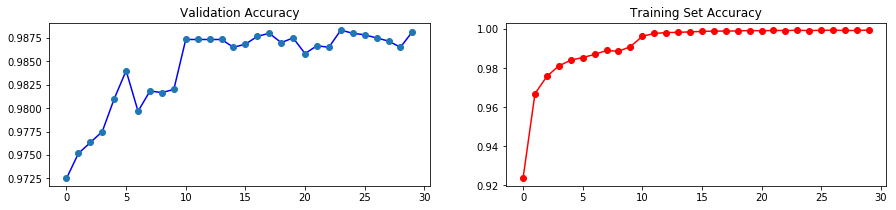

In [30]:
fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(121)
_ = ax1.plot(val_acc_history,'b',val_acc_history,'o')
ax1.set_title("Validation Accuracy")
ax2 = fig.add_subplot(122)
_ = ax2.plot(acc_history,'r',acc_history,'ro')
_ = ax2.set_title("Training Set Accuracy")

To do analysis of the neural network it may also be interesting to look at the weights:

In [32]:
weights = ffnn.get_weights()
layer_number = 0
for count,weight in enumerate(weights):
    
    if count % 2 == 0:
        layer_number +=1
        print(" ------------ ")
    if len(weight.shape) == 2:
        print("Weight matrix of layer", str(layer_number),"has shape: ",str(weight.shape))
    if len(weight.shape) == 1:
        print("Bias vector of layer", str(layer_number),"has shape: ",str(weight.shape))

 ------------ 
Weight matrix of layer 1 has shape:  (784, 1000)
Bias vector of layer 1 has shape:  (1000,)
 ------------ 
Weight matrix of layer 2 has shape:  (1000, 500)
Bias vector of layer 2 has shape:  (500,)
 ------------ 
Weight matrix of layer 3 has shape:  (500, 250)
Bias vector of layer 3 has shape:  (250,)
 ------------ 
Weight matrix of layer 4 has shape:  (250, 10)
Bias vector of layer 4 has shape:  (10,)


Lets just look at the weights of the final layer:

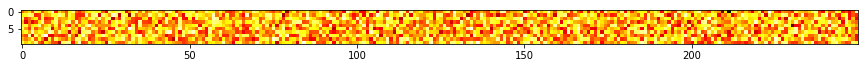

In [34]:
plt.figure(figsize = (15,10))
_ = plt.imshow(weights[6].transpose(), cmap='hot', interpolation='nearest')